## Simulation basics
### Steps
* Define possible outcomes for random variables
* Assign probabilities
* Define relationships between random variables
* Get multiple outcomes by repeated random sampling
* Analyze sample outcomes

Write a simulation for  a simple game of chance (e.g., drawing cards, rolling one or more dice, etc.)   Run the simulation 1000 times and interpret the outcome.  Post your code here, and discuss what might be done to improve it.

Now, it is time to generate the probabilities (recall that they are purely random).
They must sum up to 1 and in order to generate such numbers, we will use [dirichlet](https://en.wikipedia.org/wiki/Dirichlet_distribution)

### Throwing two fair dice

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from numpy.random import default_rng
rng = default_rng()

probs_1, probs_2 = rng.dirichlet(np.ones(6),size=2)

sides = np.arange(1,7)


argument_1 = alpha (vector of ones with length = 8)
argument_2 = size ( generate x number of probabilities) - 2 dice then, size = 2


### Simulation
we will generate 1k games in which both dice are rolled 100 times.

### Law of large numbers
According to this law, a large number of repetitions of the experiment will yield the results close to the expected outcome

In [6]:
die_1_rolls = np.random.choice(sides,
                               size= (1000, 100),
                               p= probs_1)

In [7]:
# from numpy.random import randint as U
die_2_rolls = np.random.choice(sides,
                               size= (1000, 100),
                               p= probs_2)


We now know how to implement the first two steps of a simulation. Now let's implement the next step -
defining the relationship between random variables.

size = The size argument will give us an array with 1k rows (games) and 100 columns (rolls).

### Scores
We roll every die 100 times because the least score we can get is 1, assuming we want to score 100 points
After “playing” 1k games we need to calculate the scores for each game
sum everything up, do it column-wise (from left to right) - axis = 1


In [8]:
die_1_results = die_1_rolls.cumsum(axis=1)
die_2_results = die_2_rolls.cumsum(axis=1)

In [9]:
die_1_won_game_at = np.argmax(die_1_results >= 100, axis=1)
die_2_won_game_at = np.argmax(die_2_results >= 100, axis=1)

In [10]:
die_1_win_count = np.sum(die_1_won_game_at < die_2_won_game_at)
die_2_win_count = np.sum(die_2_won_game_at < die_1_won_game_at)
tie_game_count = np.sum(die_1_won_game_at == die_2_won_game_at)

### Visualize

In [11]:
print("Die 1 won {} times". format(die_1_win_count))
print("Die 2 won {} times". format(die_2_win_count))
print("Tie games {}". format(tie_game_count))

Die 1 won 31 times
Die 2 won 952 times
Tie games 17


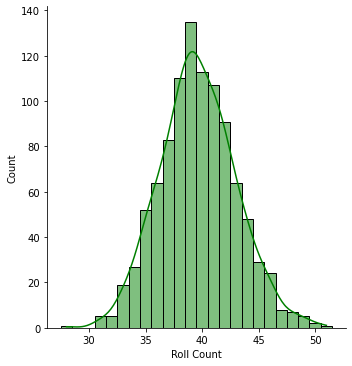

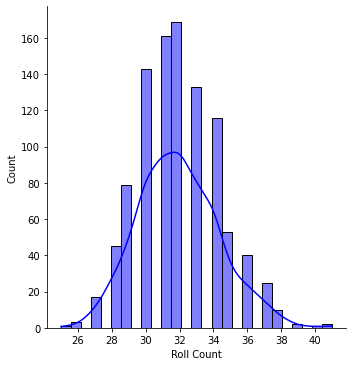

In [56]:

ax1 = sns.displot(die_1_won_game_at, color="green", kde= True, discrete = True)
ax2 = sns.displot(die_2_won_game_at, color="blue", kde = True)

ax1.set_axis_labels("Roll Count")

plt.xlabel("Roll Count")
plt.show()